# 课程： Python分析工业大数据

## 第七章 机器学习入门-回归问题   
* Linear Regression  线性回归
* SVM Regression  支持向量机回归


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor 
from sklearn.model_selection import cross_val_score

%matplotlib inline

## Load Data

In [2]:
# Load Data
df = pd.read_csv("0926AY17_MOUNTED_LCDE_2.csv")

In [3]:
df.shape

(200, 5)

In [4]:
df.head()

,PART,CAP1,DF1,ESR,LEAK
0,1,306.4690,2.59,0.02094,18.2540
1,2,312.7600,2.03,0.02068,5.9440
2,3,304.9852,2.05,0.02125,7.8581
3,4,323.5196,1.93,0.02002,15.1282
4,5,309.8660,2.00,0.02086,18.4467


In [5]:
df.dtypes

PART           int64
CAP1         float64
DF1          float64
ESR          float64
LEAK         float64
dtype: object

## Data Cleaning

In [6]:
df.keys()

Index(['PART', 'CAP1     ', 'DF1   ', 'ESR     ', 'LEAK     '], dtype='object')

In [7]:
# 去除数据表中列名的空格
df.rename(columns = lambda x: x.strip(), inplace = True)

In [8]:
df.columns

Index(['PART', 'CAP1', 'DF1', 'ESR', 'LEAK'], dtype='object')

## EDA work

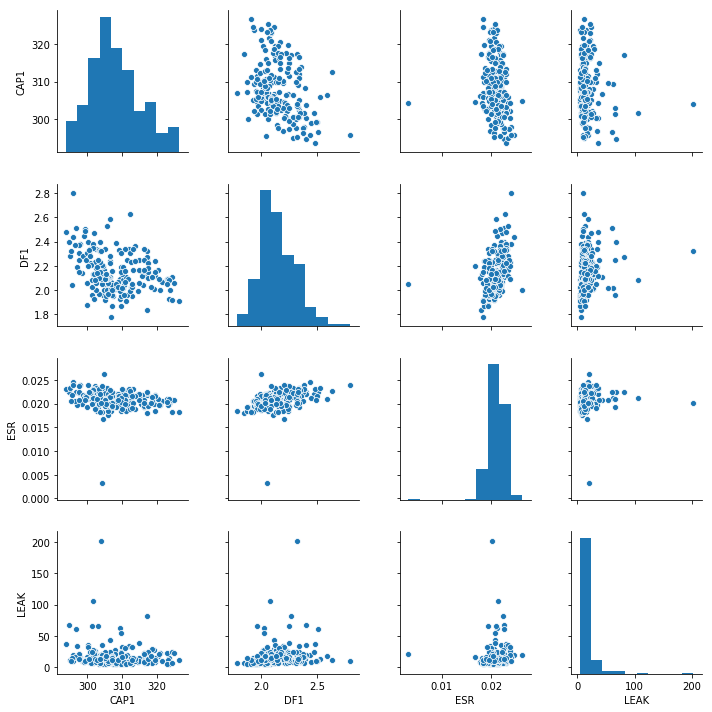

In [9]:
# Perform EDA(Exploratory Data Analysis)
cols = ['CAP1', 'DF1', 'ESR', 'LEAK']
sns.pairplot(df[cols], height = 2.5);
plt.tight_layout()

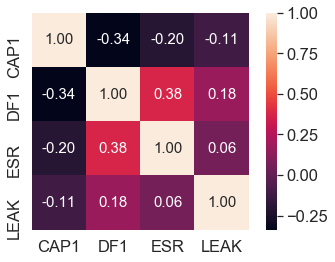

In [10]:
# investigating relationships using a correlation matrix
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.5)
hm = sns.heatmap(cm, 
                cbar = True, 
                annot = True, 
                square = True,
                fmt = '.2f',
                annot_kws = {'size': 15},
                yticklabels = cols,
                xticklabels = cols);

/Users/RichardZhou/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


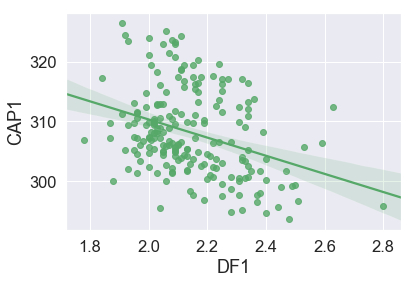

In [11]:
sns.regplot(data = df, x = 'DF1', y = 'CAP1', order = 1, color = 'g');

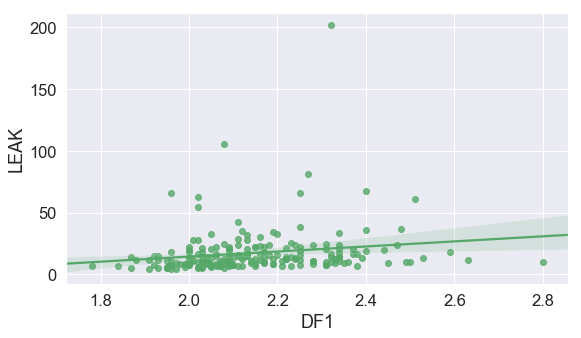

In [12]:
plt.subplots(figsize = (9, 5))
sns.regplot(data = df, x = 'DF1', y = 'LEAK', order = 1, color = 'g');

## Using Linear Regression Model

In [13]:
# Implementing a linear regression model

In [14]:
# set up X- y investigation pair
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
X = df[['DF1']].values
y = df[['ESR']].values


In [15]:
#standardize variable
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_std = sc_X.fit_transform(X)
y_std = sc_y.fit_transform(y)

In [16]:
X_std[0]

array([2.74062588])

In [17]:
# Build a linear regression model
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model.fit(X_std, y_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
LR_model.intercept_, LR_model.coef_

(array([-1.65344479e-15]), array([[0.37788096]]))

In [21]:
LR_model.predict(X_std[1].reshape(1, -1))

array([[-0.27115873]])

In [24]:
# evaluate
from sklearn.metrics import mean_squared_error
y_pred = LR_model.predict(X_std)
LR_mse = mean_squared_error(y_std, y_pred)
LR_rmse = np.sqrt(LR_mse)
LR_rmse

0.9258541888337317

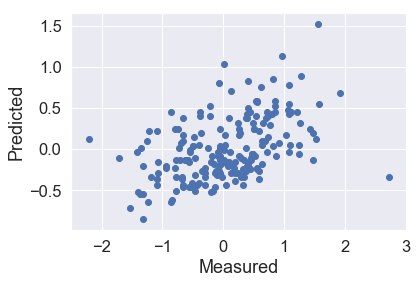

In [25]:

plt.scatter( y_std, y_pred);
plt.xlim([-2.5, 3]);
plt.xlabel('Measured');
plt.ylabel('Predicted');

## Use SVM for Regression

In [31]:
from sklearn.svm import SVR

X = df[['CAP1', 'DF1', 'ESR']].values
y = df[['LEAK']].values

In [32]:
#standardize variable
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_std = sc_X.fit_transform(X)
y_std = sc_y.fit_transform(y)

In [36]:
# Build SVM regression model
n_folds = 6
svr = SVR(C=10)
svr.fit(X_std, y_std)


/Users/RichardZhou/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
scores = cross_val_score(svr, X_std, y_std, cv = n_folds)

/Users/RichardZhou/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/RichardZhou/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/RichardZhou/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/RichardZhou/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gam

In [38]:
# evaluate
from sklearn.metrics import mean_squared_error
y_pred = svr.predict(X_std)
svr_mse = mean_squared_error(y_std, y_pred)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

0.9453459688560818

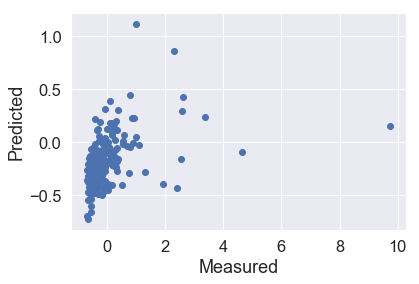

In [39]:
plt.scatter( y_std, y_pred);
#plt.xlim([-2.5, 3]);
plt.xlabel('Measured');
plt.ylabel('Predicted');

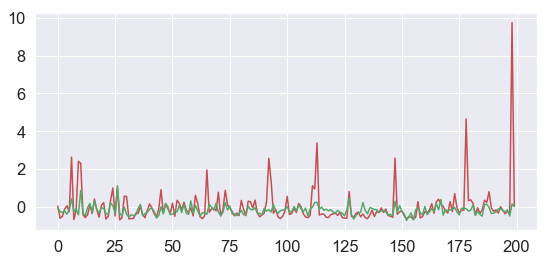

In [42]:
plt.figure(figsize=(9, 4))
plt.plot(np.arange(X.shape[0]), y_std, color='r', label='measured y');
plt.plot(np.arange(X.shape[0]), y_pred, color='g', label='predicted y');

## Use GradientBooting for Regression

In [43]:
# build GradientBooting Regression
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor 
X = df[['CAP1', 'DF1', 'ESR']].values
y = df[['LEAK']].values

In [44]:
#standardize variable
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_std = sc_X.fit_transform(X)
y_std = sc_y.fit_transform(y)

In [45]:
# Build SVM regression model
gbr = GradientBoostingRegressor ()
gbr.fit(X_std, y_std)

/Users/RichardZhou/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [46]:
# evaluate
from sklearn.metrics import mean_squared_error
y_pred = gbr.predict(X_std)
gbr_mse = mean_squared_error(y_std, y_pred)
gbr_rmse = np.sqrt(gbr_mse)
gbr_rmse

0.26825656463638736

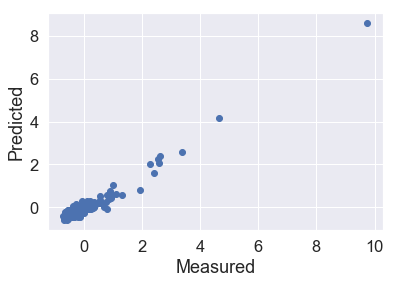

In [47]:
plt.scatter( y_std, y_pred);
#plt.xlim([-2.5, 3]);
plt.xlabel('Measured');
plt.ylabel('Predicted');

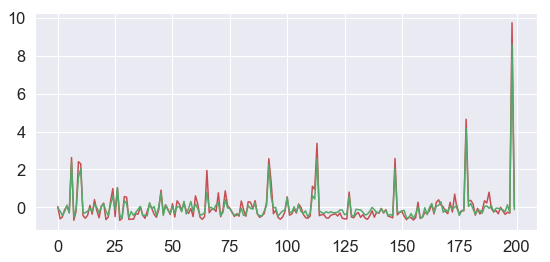

In [48]:
plt.figure(figsize=(9, 4))
plt.plot(np.arange(X.shape[0]), y_std, color='r', label='measured y');
plt.plot(np.arange(X.shape[0]), y_pred, color='g', label='predicted y');